<a href="https://colab.research.google.com/github/clozada323/Python-/blob/main/Visualizacion_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización

## 1. Dependencias

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pandoc as pdc
import seaborn as sns

## 2. Importar data

In [ ]:
#Se define la ruta en la que guardamos la data que usaremos
ruta = "D:/Users/Camilo 323/Desktop/Universidad/Python Repositorio/Corredores_Davivienda/"

In [ ]:
students = pd.read_csv(ruta+'StudentsPerformance.csv')


In [ ]:
#Cambiamos el nombre de la columna para evitar problemas con el "/"
students.rename(columns = {'race/ethnicity':'ethnicity'},inplace=True)

In [ ]:
students.isna().sum()
#No hay Na's

gender                         0
ethnicity                      0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   ethnicity                    1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
students.loc[students["parental level of education"] == "associate's degree", "parental level of education"] = 4
students.loc[students["parental level of education"] == "bachelor's degree", "parental level of education"] = 5
students.loc[students["parental level of education"] == "high school", "parental level of education"] = 2
students.loc[students["parental level of education"] == "master's degree", "parental level of education"] = 6
students.loc[students["parental level of education"] == "some college", "parental level of education"] = 3
students.loc[students["parental level of education"] == "some high school", "parental level of education"] = 1


In [ ]:
students.head()

,gender,ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,5,standard,none,72,72,74
1,female,group C,3,standard,completed,69,90,88
2,female,group B,6,standard,none,90,95,93
3,male,group A,4,free/reduced,none,47,57,44
4,male,group C,3,standard,none,76,78,75


## 3. Estadística descrptiva y visualización

In [ ]:
students['mean score']= students[['math score','reading score','writing score']].mean(axis=1)

In [ ]:
#Tabla de estadística descriptiva
#Unicamente para variables cuantitativas
students.describe()

,math score,reading score,writing score,mean score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [ ]:
students.columns

Index(['gender', 'ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Text(0.5, 1.0, 'Porcentaje de estudiantes por etnicidad')

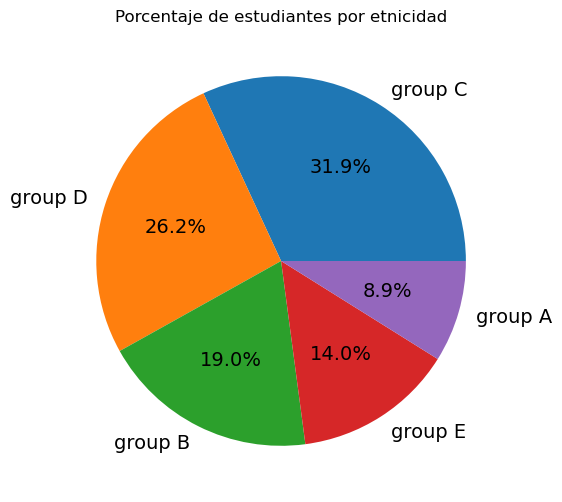

In [ ]:
#Porcentaje de estudiantes por etnicidad
plt.figure(figsize = (6,6))
plt.pie(students.ethnicity.value_counts().values, labels = students.ethnicity.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 14})
plt.title('Porcentaje de estudiantes por etnicidad')

Text(0, 0.5, 'Puntajes')

<Figure size 600x600 with 0 Axes>

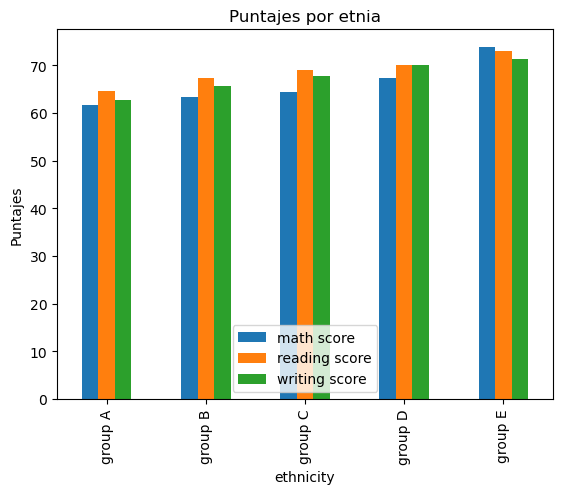

In [ ]:
plt.figure(figsize = (6,6))
pd.pivot_table(students, index = 'ethnicity', aggfunc = 'mean', values = ('math score','reading score','writing score')).plot(kind = 'bar')
plt.title('Puntajes por etnia')
plt.ylabel('Puntajes')

Text(0, 0.5, 'Puntajes')

<Figure size 600x600 with 0 Axes>

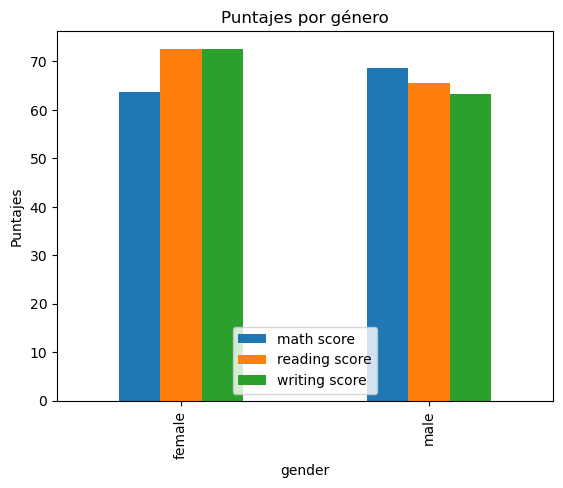

In [ ]:
plt.figure(figsize = (6,6))
pd.pivot_table(students, index = 'gender', aggfunc = 'mean', values = ('math score','reading score','writing score')).plot(kind = 'bar')
plt.title('Puntajes por género')
plt.ylabel('Puntajes')

Text(0, 0.5, 'Puntajes')

<Figure size 600x600 with 0 Axes>

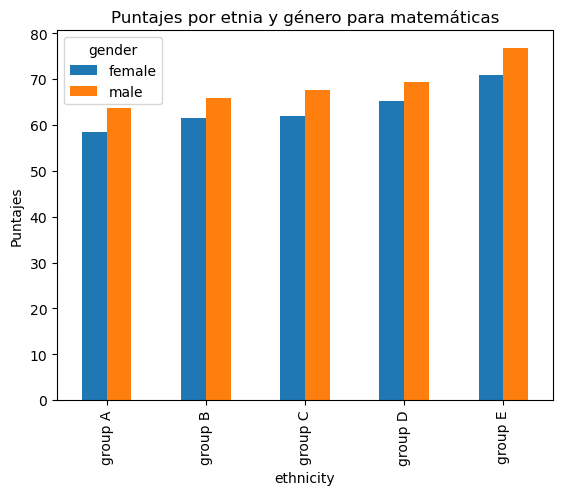

In [ ]:
plt.figure(figsize = (6,6))
pd.pivot_table(students, index = 'ethnicity', columns= 'gender',aggfunc = 'mean', values = ('math score')).plot(kind = 'bar')
plt.title('Puntajes por etnia y género para matemáticas')
plt.ylabel('Puntajes')

Text(0, 0.5, 'Puntajes')

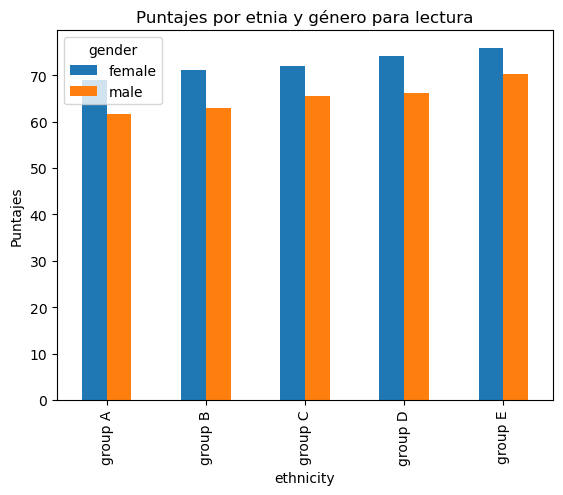

In [ ]:
pd.pivot_table(students, index = 'ethnicity', columns= 'gender',aggfunc = 'mean', values = ('reading score')).plot(kind = 'bar')
plt.title('Puntajes por etnia y género para lectura')
plt.ylabel('Puntajes')

Text(0, 0.5, 'Puntajes')

<Figure size 600x600 with 0 Axes>

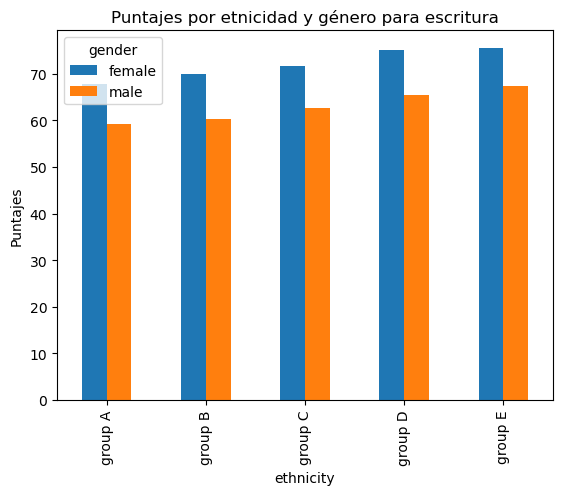

In [ ]:
plt.figure(figsize = (6,6))
pd.pivot_table(students, index = 'ethnicity', columns= 'gender',aggfunc = 'mean', values = ('writing score')).plot(kind = 'bar')
plt.title('Puntajes por etnicidad y género para escritura')
plt.ylabel('Puntajes')

Según esta muestra, las mujeres tienen mejores puntajes en lectura y escritura que los hombres y los hombres mejores en lasmatemáticas que las mujeres. Estos resultados son consistentes para todos los grupos étnicos, además vale la pensa agregar que el grupo E es mejor que todos los otros en las 3 pruebas y el grupo A es el peor en todas las pruebas.

C:\Users\Camilo 323\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean score', ylabel='parental level of education'>

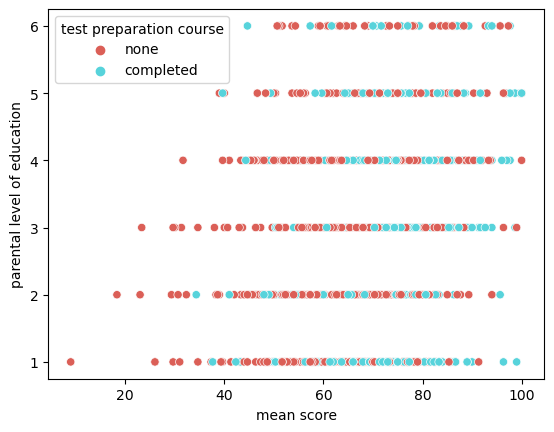

In [ ]:
#Scatter plot
sns.scatterplot(students['mean score'],students['parental level of education'], hue = students['test preparation course'],palette=sns.color_palette("hls",2))


C:\Users\Camilo 323\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean score', ylabel='parental level of education'>

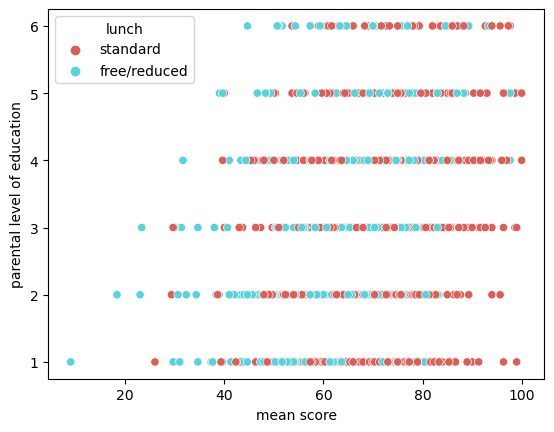

In [ ]:
#Scatter plot 2
sns.scatterplot(students['mean score'],students['parental level of education'], hue = students['lunch'],palette=sns.color_palette("hls",2))
